In [ ]:
import pandas as pd
import seaborn as sb

emoticon_data = 'english_1M_emoticons.csv'
hashtag_data = 'english_1M_hashtags.csv'

def read_csv(csv_name):
    return pd.read_csv(csv_name, index_col=0, encoding='utf-8', low_memory=False)

emoticon = read_csv(emoticon_data)
hashtag = read_csv(hashtag_data)

# Remove tweets which have a high standard deviation
hashtag = hashtag[hashtag['standard_deviation'] < 0.35]

In [2]:
def get_range(df, begin, end):
    return df[(df['sentiment_score'] >= begin) & (df['sentiment_score'] <= end)]

def remove_range(df, begin, end):
    return df[(df['sentiment_score'] < begin) | (df['sentiment_score'] > end)]

hashtag_cut = remove_range(hashtag, -0.05, 0.05)

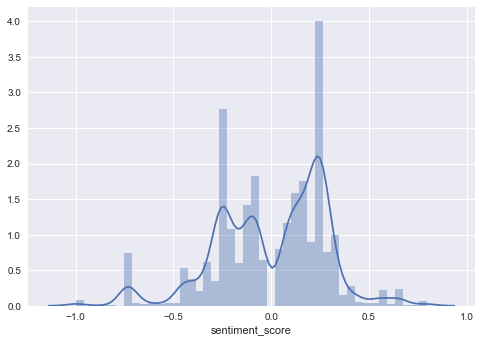

In [3]:
sb.distplot(hashtag_cut['sentiment_score'])
sb.plt.show()

In [4]:
pd.options.mode.chained_assignment = None  # default='warn'

def assign_sentiment(row):
    if row['sentiment_score'] > 0:
        return 'positive'
    return 'negative'

hashtag_cut['sentiment'] = hashtag_cut.apply(assign_sentiment, axis=1)

In [5]:
emoticon['sentiment'].value_counts()

positive    15657
negative     8993
Name: sentiment, dtype: int64

In [6]:
hashtag_cut['sentiment'].value_counts()

positive    6111
negative    5366
Name: sentiment, dtype: int64

In [7]:
emoticon.index = emoticon['tweet_id']
emoticon = emoticon.drop('tweet_id', 1)

hashtag_cut.index = hashtag_cut['tweet_id']
hashtag_cut = hashtag_cut.drop('tweet_id', 1)

In [8]:
# Find the tweets with overlapping tweet_ids
# Remove the ones with conflicting sentiment labels

overlap = emoticon[emoticon.index.isin(hashtag_cut.index)]
overlap = overlap.rename(columns={'sentiment': 'emoticon_sentiment'})
overlap['hashtag_sentiment'] = hashtag_cut['sentiment'][overlap.index]
conflict = overlap[overlap['emoticon_sentiment'] != overlap['hashtag_sentiment']]

In [9]:
def remove_indices(df, indices):
    return df[~df.index.isin(indices)]

emoticon = remove_indices(emoticon, conflict.index)
hashtag_cut = remove_indices(hashtag_cut, conflict.index)

In [10]:
emoticon['sentiment'].value_counts()

positive    15623
negative     8968
Name: sentiment, dtype: int64

In [11]:
emoticon

,tweet,emoticons,sentiment
tweet_id,,,
2716512353,@mgi88s don't play me nigglet. I'm 20 & 191 da...,=),positive
5546240410,Minus 2 degrees Celsius out there and feels it...,:(,negative
3303745636,"@BrentCorrigan You are fabulous, I love you. :]\n",:],positive
4090700932,@GroovyTGoddess What do you suppose My b-prese...,:(,negative
4973529299,@AnthonyVeloso Blahhhhh. He really pisses me o...,:(,negative
3145142462,@alanstevens @thesnarkyone Head still hurts. I...,:-),positive
3315135989,@eviljeanius You're the first person i've hear...,:D,positive
1588251351,@AliMaadelat Miserably rainy day - but other t...,:-),positive
5224833264,I see so many pugs on the street and in the me...,:(,negative


In [12]:
hashtag_cut['sentiment'].value_counts()

positive    6086
negative    5332
Name: sentiment, dtype: int64

In [24]:
# Strip hashtags and emoticons from tweets
import label_sentiment as ls
import imp

imp.reload(ls)

data = emoticon.append(hashtag_cut)
cleaned = data['tweet'].map(ls.clean)
data['tweet'] = cleaned

In [25]:
from sklearn.model_selection import train_test_split

X = data['tweet']
y = data['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

def join_series(s1, s2):
    return pd.concat([s1, s2], axis=1)

train = join_series(X_train, y_train)
train.to_csv('sentiment_train.csv', encoding='utf-8')

test = join_series(X_test, y_test)
test.to_csv('sentiment_test.csv', encoding='utf-8')